# Part 1

## BBC Dataset

Three feature extraction methods were implemented for the BBC dataset. 

### 1. Bag Of Words

Terminology used in business articles is different from tech articles. This is common knowledge. Certain terms occur more frequently in articles of certain topics than others. It seemed like a good fit to solve the problem. The BBC dataset files also hinted towards using this method as they were giving the exact information needed for this method.

### 2. TF-IDF
 
In TF-IDF, terms that occur frequently in a document are give more weight. Terms that occur in many different types of documents are given less weight. These terms are considered 'less unique' for a topic.
Even though stop words like 'the', 'a', 'is' were already removed in the BBC dataset files, giving less weight to terms that occurred in many different documents seemed fit for better training. By decreasing the influence of common terms, we can make better predictions.

### 3. One Hot Encoding

This method gives less information than Bag Of Words. Instead of counting the frequency of each term in a document, it simply tells us wether a term is present or not. We wanted to test if this minimal information is enough. It proved to show that it is indeed enough with excellent accuracy. Knowledge about what terms exists in a document is enough to predict its topic. 

### Collect measurements

In [15]:
from bbc_tf_idf import tf_idf_measurements
from bbc_one_hot import one_hot_measurements
from bbc_bag_word import bow_measurements

smoothings = [0.05,0.5,1,10,100]
learning_rates = [0.0001,0.001,0.01,0.1,1,1.5]

tf_naive, tf_logistic = tf_idf_measurements(smoothings, learning_rates)
one_naive, one_logistic = one_hot_measurements(smoothings, learning_rates)
bag_naive, bag_logistic = bow_measurements(smoothings, learning_rates)



### Naive Bayes

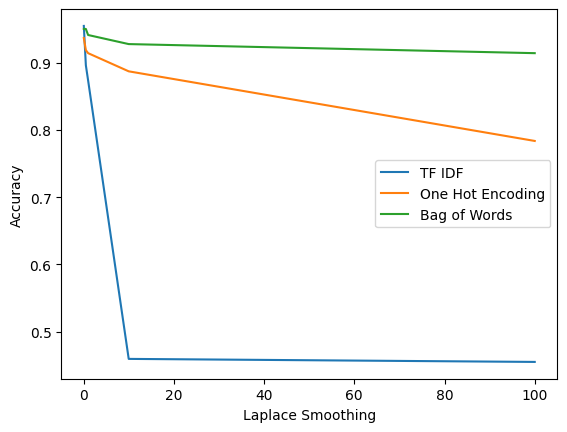

In [16]:
import matplotlib.pyplot as plt

plt.plot(smoothings,tf_naive, label='TF IDF')
plt.plot(smoothings, one_naive, label='One Hot Encoding')
plt.plot(smoothings, bag_naive, label='Bag of Words')

plt.xlabel("Laplace Smoothing")
plt.ylabel("Accuracy")
plt.legend()



### Logistic Regression

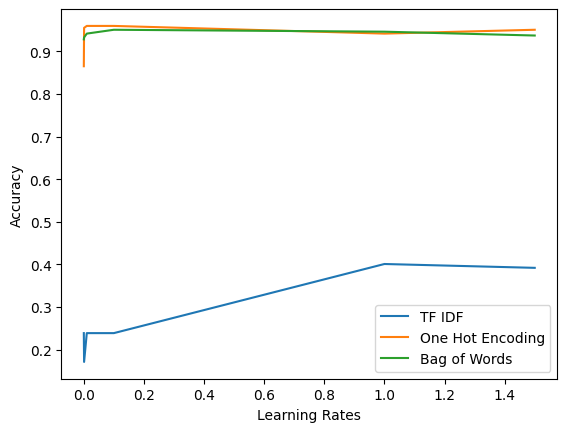

In [17]:
import matplotlib.pyplot as plt

plt.plot(learning_rates, tf_logistic, label='TF IDF')
plt.plot(learning_rates, one_logistic, label='One Hot Encoding')
plt.plot(learning_rates, bag_logistic, label='Bag of Words')

plt.xlabel("Learning Rates")
plt.ylabel("Accuracy")
plt.legend()



## MNIST Dataset

Three feature extraction methods were implemented for the MNIST dataset.

### 1. Binary Scale
The images were given to us as grey scale images. In this custom feature extraction method, the grey scale images are converted to images whose pixel values were 0 or 1 (binary). After that, the new image itself was directly used for training. Even though there was no dimensionality reduction, it seemed useful for training models for accuracy. It also was somewhat a 'normalized' version of training the models directly using the original images. It showed that it was good for training the models. 

### 2. Row Density
The grey scale image initially has pixel values from 0 to 255. After some processing, each pixel value will be reduced to 0 or 1. After that each row will have its row density calculated. Its the ratio of pixels with the value of 1 to the pixels in the row in total.
Most digits are made up of straight line strokes. Horizontal and a vertical strokes bring about very different row densities. We suspected that such difference would have enough information to tell what a digit is.


### 3. Compression
In this custom feature extraction method, every pixel in an image is turned into either 0 or 1. Integers in python can be represented by 32 bits. Every row in the image is interpreted as a number in a binary format. It is then converted to its decimal form. A row, that occupies 28 spaces is now represented by a single integer. This seemed useful to reduce the dimensionality of our features by compressing the image in this way.

### Collect Measurements
The feature extraction methods and training the models for this dataset take a long time to finish. 

For the following hyper parameters: 
- 5 laplace smoothings values
- 5 learning rates
- 10 number of iterations for logistic regression

It took over 30 minutes to calculate the accuracy of the Binary Scaling method alone. 

We have therefore reduced the laplace smoothing values and learning rates to 3 values. We have reduced the number of iterations of the logistic regression to 1. It finished in around 10 minutes.

In [1]:
from mnist_binary_scale import binary_scale_measurements
from mnist_compression import compression_measurements
from mnist_row_density import row_density_measurements

smoothings = [0.001,0.5, 1]
learning_rates = [0.0001, 0.1, 1.5]

In [2]:
binary_naive, binary_logistic = binary_scale_measurements(smoothings, learning_rates)


In [3]:
compression_naive, compression_logistic = compression_measurements(smoothings, learning_rates)


In [4]:
row_naive, row_logistic = row_density_measurements(smoothings, learning_rates)


### Naive Bayes


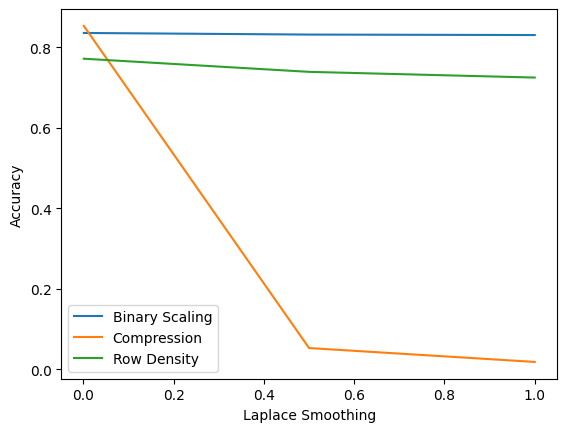

In [5]:
import matplotlib.pyplot as plt

plt.plot( smoothings,binary_naive, label='Binary Scaling')
plt.plot( smoothings,compression_naive, label='Compression')
plt.plot( smoothings,row_naive, label='Row Density')

plt.xlabel("Laplace Smoothing")
plt.ylabel("Accuracy")
plt.legend()

### Logistic Regression

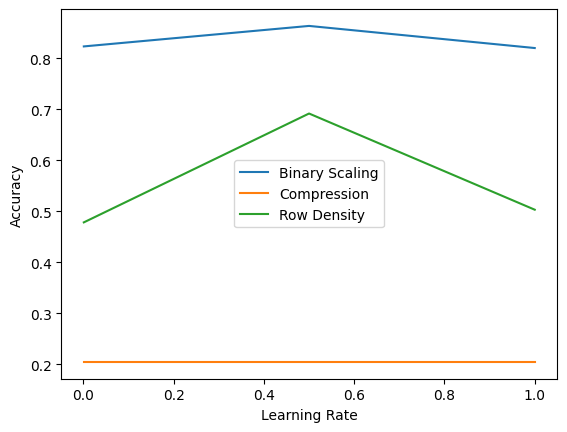

In [7]:
import matplotlib.pyplot as plt

plt.plot( smoothings,binary_logistic, label='Binary Scaling')
plt.plot( smoothings,compression_logistic, label='Compression')
plt.plot( smoothings,row_logistic, label='Row Density')

plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.legend()

## Weather Dataset

### Label Encoding
The Weather Dataset had small number of features. No dimension reduction was needed. Based on its simplicity, we chose to use label encoding. All of the features were categorical and were represented by strings. We used label encoding to map the strings to numbers. 

### Collect measurements


In [9]:
from weather_classifier import weather_measurements

smoothings = [0.05,0.5,1,10,100]
learning_rates = [0.0001,0.001,0.01,0.1,1,1.5]

In [10]:
weather_naive, weather_logistic = weather_measurements(smoothings, learning_rates)


### Naive Bayes

Text(0, 0.5, 'Accuracy')

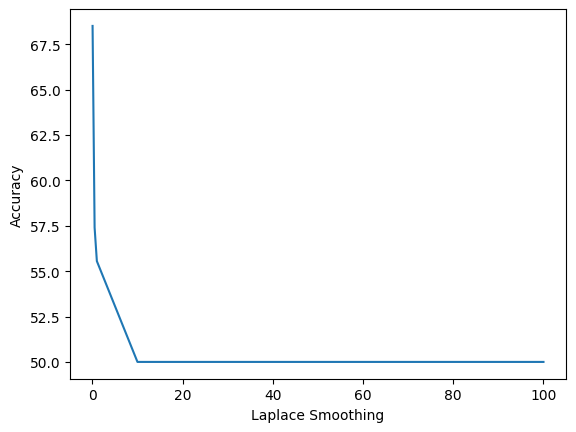

In [11]:
import matplotlib.pyplot as plt

plt.plot( smoothings,weather_naive, label='Label Encoding')

plt.xlabel("Laplace Smoothing")
plt.ylabel("Accuracy")


### Logistic Regression

Text(0, 0.5, 'Accuracy')

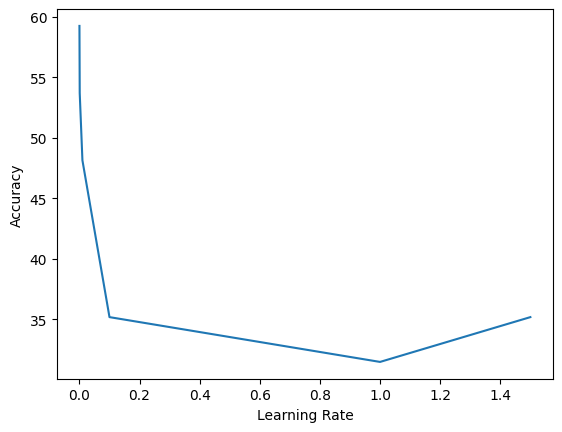

In [12]:
import matplotlib.pyplot as plt

plt.plot( learning_rates ,weather_logistic, label='Label Encoding')

plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
